Import libraries

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from metrics import print_evaluation_metrics

Load dataset and prepare df

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column]]

df.set_index(date_column, inplace=True)
df = df.groupby(date_column).sum().reset_index()

df = df.dropna()

Train test split

In [3]:
train = df.iloc[:-30]
test = df.iloc[-30:]

Parameter tuning for order

In [4]:
stepwise_fit = auto_arima(df[target_column], trace=True, suppress_warnings=True)
best_order = stepwise_fit.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25842.497, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26938.672, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26577.770, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26050.334, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26936.672, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25888.229, Time=0.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26029.229, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25790.349, Time=0.96 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26039.943, Time=0.23 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=25820.587, Time=1.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25703.637, Time=1.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25864.228, Time=0.95 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=25781.779, Time=1.50 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=25752.190, Time=1.56 sec
 ARIMA(2,1,4)(0,0,0

Create Model

In [5]:
model = ARIMA(train[target_column], order=best_order)
model = model.fit()
model.summary()

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New_deaths   No. Observations:                 1390
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -12379.334
Date:                Sun, 10 Dec 2023   AIC                          24780.668
Time:                        10:41:23   BIC                          24838.268
Sample:                             0   HQIC                         24802.209
                               - 1390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0770      0.063      1.215      0.225      -0.047       0.201
ar.L2         -0.8695      0.057    -15.331      0.000      -0.981      -0.758
ar.L3         -0.2248      0.089     -2.519      0.012      -0.400      -0.050
ar.L4         -0.4126      0.054     -7.597      0.000      -0.519      -0.306
ar.L5         -0.6904      0.059    -11.723      0.000      -0.806      -0.575
ma.L1         -1.2558      0.081    -15.526      0.000      -1.414      -1.097
ma.L2          1.5585      0.119     13.053      0.000       1.324       1.793
ma.L3         -1.2913      0.127    -10.158      0.000      -1.540      -1.042
ma.L4          0.9960      0.082     12.144      0.000       0.835       1.157
ma.L5         -0.4067      0.068     -6.018      0.000      -0.539      -0.274
sigma2      6.409e+06    4.9e-08   1.31e+14      0.000    6.41e+06    6.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   7.08   Jarque-Bera (JB):             22600.46
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             2.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.57e+29. Standard errors may be unstable.
"""

Plot the result

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

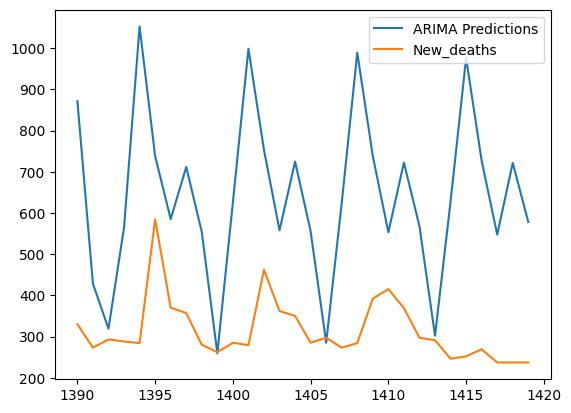

In [6]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ="levels").rename("ARIMA Predictions")
pred.plot(legend=True)
test[target_column].plot(legend=True)

RMSE of the result

In [7]:
print_evaluation_metrics(pred, test[target_column])

Evaluation Metrics:
MSE: 150407.55
RMSE: 387.82
MAE: 328.26
MAPE: 112.04
SMAPE: 63.72
